In [1]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential

In [2]:
with open("genetics_train/X_train_vcf.pkl",'rb') as f:
        X_train=np.load(f,allow_pickle=True)
with open("genetics_train/y_train_vcf.pkl",'rb') as f:
    y_train=np.load(f,allow_pickle=True)

In [3]:
def train():       
    acc = []
    f1 = []
    precision = []
    recall = []
    model = Sequential()
    model.add(Dense(128, input_shape = (212444,), activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.5))

    model.add(Dense(32, activation = "relu"))
    model.add(Dropout(0.3))

    model.add(Dense(32, activation = "relu"))
    model.add(Dropout(0.3))


    model.add(Dense(3, activation = "softmax"))

    model.compile(Adam(learning_rate = 0.001), "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])


    history = model.fit(X_train, y_train,epochs=100,batch_size=256,validation_split = 0.1, verbose=1) 
    model.save("train_genetic_model.hdf5")


    plt.clf()
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.clf()

Epoch 1/100
8/8 [==============================] - 7s 488ms/step - loss: nan - sparse_categorical_accuracy: 0.3615 - val_loss: nan - val_sparse_categorical_accuracy: 0.3934
Epoch 2/100
8/8 [==============================] - 4s 526ms/step - loss: nan - sparse_categorical_accuracy: 0.3985 - val_loss: nan - val_sparse_categorical_accuracy: 0.3934
Epoch 3/100
8/8 [==============================] - 4s 522ms/step - loss: nan - sparse_categorical_accuracy: 0.3985 - val_loss: nan - val_sparse_categorical_accuracy: 0.3934
Epoch 4/100
8/8 [==============================] - 4s 509ms/step - loss: nan - sparse_categorical_accuracy: 0.3985 - val_loss: nan - val_sparse_categorical_accuracy: 0.3934
Epoch 5/100
8/8 [==============================] - 4s 506ms/step - loss: nan - sparse_categorical_accuracy: 0.3985 - val_loss: nan - val_sparse_categorical_accuracy: 0.3934
Epoch 6/100
8/8 [==============================] - 4s 488ms/step - loss: nan - sparse_categorical_accuracy: 0.3985 - val_loss: nan - va

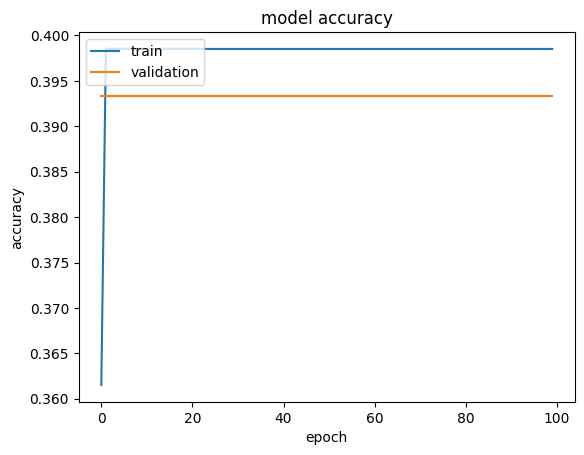

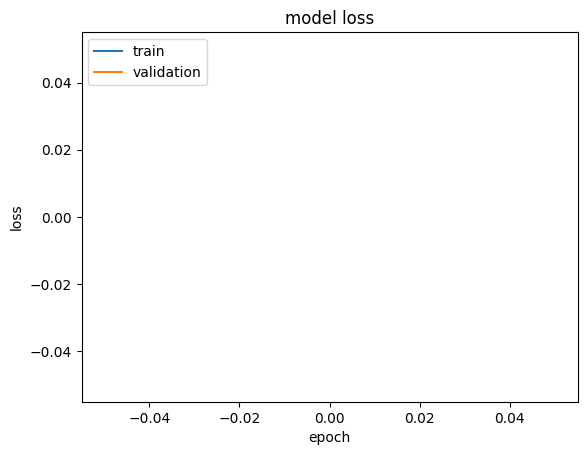

<Figure size 640x480 with 0 Axes>

In [4]:
train()